In [1]:
# Importat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the dataset

data_cut = pd.read_csv\
("/home/adzavon/Documents/MSC_Data_Analysis/merge for forecasting/second_to_forecast (another copy).csv")


# fill the missing values in "Floods","Storms" by "0"
data_cut[["Floods","Storms"]] = data_cut[["Floods","Storms"]].fillna("0")


# change "Floods","Storms" data type into intger

data_cut["Floods"] = data_cut["Floods"].astype(int)
data_cut["Storms"] = data_cut["Storms"].astype(int)

#linear method to fill the missang value
# data_cut = data_cut.fillna(method="ffill")
data_cut = data_cut.interpolate(method ='linear', limit_direction ='forward')
data_cut["Internal Displaced People"] = data_cut["Internal Displaced People"].astype(int)
data_cut

,EVENT_DATE,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,Floods,Storms,Internal Displaced People
0,2018-07,5,0,1,0,1,9,18,3,27347
1,2018-08,7,3,3,2,3,3,211,4,27571
2,2018-09,8,5,4,2,11,20,33,0,38982
3,2018-10,9,3,16,1,12,19,3,0,39731
4,2018-11,15,2,24,11,15,20,0,0,37367
5,2018-12,11,4,11,4,11,21,0,0,47826
6,2019-01,9,3,32,3,4,41,0,0,81964
7,2019-02,20,3,11,5,16,17,0,0,112057
8,2019-03,14,6,5,3,8,31,0,0,135589
9,2019-04,18,2,18,3,8,52,0,3,161217


# Univariate MLP Models for IDP forcast

In [2]:
# from numpy import array
# from keras.models import Sequential
# from keras.layers import Dense

# def split_sequence(sequence,n_steps):
#     x,y = list(),list()
#     for i in range(len(sequence)):
#         end_ix = i + n_steps
#         #check if we are in the beyound the sequence
#         if end_ix > len(sequence)-1:
#             break
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         x.append(seq_x)
#         y.append(seq_y)
#     return array(x),array(y)

# series  = data_cut["Internal Displaced People"]
# n_steps = 2
# x,y = split_sequence(series,2)

# # define a model 
# model  = Sequential()
# model.add(Dense(100, activation="relu",input_dim = n_steps))
# model.add(Dense(1))
# model.compile(optimizer="adam",loss="mse")

# #fit the model

# model.fit(x,y, epochs = 2000, verbose = 0)

# x_input = array([1810105, 1882391])
# x_input = x_input.reshape((1, n_steps))
# yhat = model.predict(x_input, verbose=0)
# print("Univariate forecast for January 2023: ",int(yhat))

# Multivariate MLP Models for IDP

In [3]:
from numpy import array
from numpy import hstack

def split_sequence(sequence, n_step):
    x ,y = list(), list()
    for i in range(len(sequence)):
        endix = i + n_step
        if endix > len(sequence):
            break
        seq_x , seq_y = sequence[i:endix,:-1], sequence[endix-1,-1]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# define input sequence
in_seq1 = array(data_cut["Battles"])
in_seq2 = array(data_cut["Explosions/Remote violence"])
out_seq = array(data_cut["Internal Displaced People"])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
x, y = split_sequence(dataset, n_steps)
print(x.shape, y.shape)
# summarize the data
for i in range(len(x)):
    print(x[i], y[i])
               

(52, 3, 2) (52,)
[[5 0]
 [7 3]
 [8 5]] 38982
[[7 3]
 [8 5]
 [9 3]] 39731
[[ 8  5]
 [ 9  3]
 [15  2]] 37367
[[ 9  3]
 [15  2]
 [11  4]] 47826
[[15  2]
 [11  4]
 [ 9  3]] 81964
[[11  4]
 [ 9  3]
 [20  3]] 112057
[[ 9  3]
 [20  3]
 [14  6]] 135589
[[20  3]
 [14  6]
 [18  2]] 161217
[[14  6]
 [18  2]
 [16  2]] 171994
[[18  2]
 [16  2]
 [17  3]] 219756
[[16  2]
 [17  3]
 [26  4]] 237769
[[17  3]
 [26  4]
 [15  5]] 288994
[[26  4]
 [15  5]
 [12  5]] 289591
[[15  5]
 [12  5]
 [21  4]] 486360
[[12  5]
 [21  4]
 [23  6]] 523196
[[21  4]
 [23  6]
 [21  9]] 560033
[[23  6]
 [21  9]
 [15 10]] 613792
[[21  9]
 [15 10]
 [18  7]] 779741
[[15 10]
 [18  7]
 [27  4]] 838543
[[18  7]
 [27  4]
 [28  8]] 848329
[[27  4]
 [28  8]
 [37 12]] 884900
[[28  8]
 [37 12]
 [20  6]] 921471
[[37 12]
 [20  6]
 [23  7]] 978744
[[20  6]
 [23  7]
 [19  5]] 1013234
[[23  7]
 [19  5]
 [22  9]] 1034609
[[19  5]
 [22  9]
 [18  3]] 1042188
[[22  9]
 [18  3]
 [ 9  3]] 1049767
[[18  3]
 [ 9  3]
 [ 7  2]] 1074993
[[ 9  3]
 [ 7  

In [4]:
n_input = x.shape[1] * x.shape[2]
x = x.reshape((x.shape[0],n_input))

In [5]:
# define a model 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100,activation="relu",input_dim = n_input))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

# fit the model

model.fit(x,y, epochs=2000,verbose=0)
#prediction

x_input = array([[36,30],[3,1],[33,22]])
x_input = x_input.reshape((1,n_input))
yhat = model.predict(x_input,verbose=0)
print(yhat)

2023-03-20 09:20:08.320525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 09:20:08.548547: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-20 09:20:08.595657: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/lib
2023-03-20 09:20:08.595690: I tensorflow/stream_executor/cuda/cudart_stub.cc:29]

[[206317.61]]


# Multi-headed MLP Model

In [6]:
from numpy import array, hstack
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers.merging import concatenate


def split_sequence(sequence, n_steps):
    x,y = list(), list()
    for i in range(len(sequence)):
        endix = i + n_steps
        if endix > len(sequence):
            break
        seq_x, seq_y = sequence[i:endix, :-1], sequence[endix-1,-1]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# define the input sequence
in_seq1 = array(data_cut["Battles"])
in_seq2 = array(data_cut["Explosions/Remote violence"])
out_seq = array(data_cut["Internal Displaced People"])

# convert to [rows, columns] structure

in_seq1 = in_seq1.reshape(len(in_seq1),1)
in_seq2 = in_seq2.reshape(len(in_seq2),1)
out_seq = out_seq.reshape(len(out_seq),1)

dataset = hstack((in_seq1,in_seq2, out_seq))
n_steps = 3

x, y = split_sequence(dataset,n_steps)
x1 = x[:,:,0]
x2 = x[:,:,1]

visible1 = Input(shape=(n_steps))
dense1 = Dense(100,activation="relu")(visible1)

visible2 = Input(shape=(n_steps))
dense2 = Dense(100,activation="relu")(visible2)

merge = concatenate([dense1,dense2])
output = Dense(1)(merge)
model = Model(inputs = [visible1,visible2],outputs = output)
model.compile(optimizer="adam",loss = "mse")

model.fit([x1,x2],y,epochs=2000,verbose=0)

x_input = array([[36,30],[3,1],[33,22]])
x1 = x_input[:,0].reshape((1,n_steps))
x2 = x_input[:,0].reshape((1,n_steps))

yhat = model.predict([x1,x2],verbose=0)
print(yhat)

[[221843.72]]


In [7]:
# multiparallele


from numpy import array, hstack
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers.merging import concatenate


def split_sequence(sequence, n_steps):
    x,y = list(), list()
    for i in range(len(sequence)):
        endix = i + n_steps
        if endix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:endix, :], sequence[endix-1,:]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# define the input sequence
in_seq1 = array(data_cut["Battles"])
in_seq2 = array(data_cut["Explosions/Remote violence"])
out_seq = array(data_cut["Internal Displaced People"])

# convert to [rows, columns] structure

in_seq1 = in_seq1.reshape(len(in_seq1),1)
in_seq2 = in_seq2.reshape(len(in_seq2),1)
out_seq = out_seq.reshape(len(out_seq),1)

dataset = hstack((in_seq1,in_seq2, out_seq))
n_steps = 3

x, y = split_sequence(dataset,n_steps)


n_input = x.shape[1] * x.shape[2]
x = x.reshape((x.shape[0],n_input))
n_output = y.shape[1]

model = Sequential()
model.add(Dense(100,activation="relu",input_dim = n_input))
model.add(Dense(n_output))
model.compile(optimizer="adam",loss="mse")

# fit the model

model.fit(x,y, epochs=2000,verbose=0)
#prediction

x_input = array([[36,30,1761915],[3,1,1810105],[33,22,1882391]])
x_input = x_input.reshape((1,n_input))
yhat = model.predict(x_input,verbose=0)
print(yhat)

[[3.1717908e+02 6.4735321e+02 1.8827092e+06]]


# Multiple Parallel Input and Multi-step Output   with MLP

In [8]:
from numpy import array, hstack
from keras.models import Sequential
from keras.layers import Dense


def split_sequence(sequence, n_steps_in,n_steps_out):
    x,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x,seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix,:]
        x.append(seq_x)
        y.append(seq_y)
    return array(x),array(y)

# define the input sequence
in_seq1 = array(data_cut["Battles"])
in_seq2 = array(data_cut["Explosions/Remote violence"])
out_seq = array(data_cut["Internal Displaced People"])

# convert to [rows, columns] structure

in_seq1 = in_seq1.reshape(len(in_seq1),1)
in_seq2 = in_seq2.reshape(len(in_seq2),1)
out_seq = out_seq.reshape(len(out_seq),1)

dataset = hstack((in_seq1,in_seq2, out_seq))
n_steps_in,n_steps_out = 3,24

x,y = split_sequence(dataset,n_steps_in,n_steps_out)

n_input = x.shape[1] * x.shape[2]
x = x.reshape((x.shape[0],n_input))
n_output = y.shape[1]*y.shape[2]
y = y.reshape((y.shape[0],n_output))

model = Sequential()
model.add(Dense(100,activation="relu",input_dim = n_input))
model.add(Dense(n_output))
model.compile(optimizer="adam",loss="mse")

# fit the model

model.fit(x,y, epochs=1000,verbose=0)
#prediction

x_input = array([[36,30,1761915],[3,1,1810105],[33,22,1882391]])
x_input = x_input.reshape((1,n_input))
yhat = model.predict(x_input,verbose=0)
print(yhat)

[[-2.7664936e+01 -4.3631354e+02  1.9364318e+06  4.7189899e+02
  -1.7209382e+03  2.0079976e+06 -1.7983572e+02 -1.8543088e+02
   2.0601826e+06  1.1317858e+03  4.4203056e+01  2.1117605e+06
  -8.7852625e+02 -1.1385715e+02  2.1933742e+06 -2.5115288e+02
   5.1773193e+02  2.2519645e+06  4.5288216e+01 -9.7540874e+00
   2.3469542e+06 -2.0149664e+03 -1.7028485e+02  2.4356050e+06
   1.3167833e+03  6.2197762e+00  2.5004445e+06 -1.3151743e+02
  -1.0685966e+02  2.6005890e+06 -6.3349976e+02  1.9421765e+02
   2.6855475e+06 -1.7187210e+02 -1.3022469e+02  2.7813280e+06
   1.1230872e+03  3.1863129e+01  2.8997358e+06 -1.2139942e+01
   3.6111618e+02  3.0376260e+06 -4.5181171e+02  1.0620016e+03
   3.1367058e+06 -3.2420398e+02 -8.0606567e+02  3.1823395e+06
   5.2186072e+02 -4.5685562e+01  3.2386528e+06 -1.0475890e+03
  -1.2108823e+02  3.2799538e+06  1.4183513e+03 -8.0391068e+01
   3.3163578e+06  3.3588108e+03  4.9901703e+02  3.4312438e+06
   3.2805565e+01  5.8448948e+01  3.3901300e+06  1.7441420e+03
  -2.582

In [9]:
1.9079495e+06 , 1.9657676e+06 ,  2.0137478e+06

(1907949.5, 1965767.6, 2013747.8)

# Develop CNNs for Time Series Forecasting

In [10]:
# univariate cnn example

from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling1D, Conv1D,BatchNormalization
from numpy import array, hstack

def split_sequence(sequence,n_steps):
    x,y  = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x),array(y)

raw_seq = data_cut["Internal Displaced People"]
n_steps = 2
x,y = split_sequence(raw_seq,n_steps)
n_feature = 1
x = x.reshape(x.shape[0],x.shape[1],n_feature)

# define model

model = Sequential()
model.add(Conv1D(64,2, activation="relu",input_shape = (n_steps,n_feature)))
#model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss = "mse")

# fit the model

model.fit(x,y,epochs=1000,verbose=0)
x_input = array([1810105, 1882391])
x_input = x_input.reshape((1, n_steps,n_feature))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1927905.4]]


In [11]:
# multivariate cnn example

from numpy import array, hstack
from keras.models import Sequential
from keras.layers import Dense, Flatten,MaxPooling1D, Conv1D

def split_sequence(sequence,n_steps):
    x,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1,-1]
        x.append(seq_x)
        y.append(seq_y)
    return array(x),array(y)

# define the input sequence
in_seq1 = array(data_cut["Battles"])
in_seq2 = array(data_cut["Explosions/Remote violence"])
out_seq = array(data_cut["Internal Displaced People"])

# convert to [rows, columns] structure

in_seq1 = in_seq1.reshape(len(in_seq1),1)
in_seq2 = in_seq2.reshape(len(in_seq2),1)
out_seq = out_seq.reshape(len(out_seq),1)

dataset = hstack((in_seq1,in_seq2, out_seq))
n_steps = 3

x,y = split_sequence(dataset,n_steps)
n_feature = x.shape[2]
model = Sequential()
model.add(Conv1D(64,2, activation="relu",input_shape = (n_steps,n_feature)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss = "mse")

model.fit(x,y,epochs=1000,verbose=0)
x_input = array([[36,30],[3,1],[33,22]])
x_input = x_input.reshape((1,n_steps,n_feature))
yhat = model.predict(x_input,verbose=0)
print(yhat)

[[696237.75]]


In [12]:
# multivariate output multi-step 1d cnn example

from numpy import array, hstack
from keras.models import Sequential
from keras.layers import Dense, Flatten,MaxPooling1D, Conv1D

def split_sequence(sequence, n_steps_in, n_steps_out):
    x,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x,seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix,:]
        x.append(seq_x)
        y.append(seq_y)
    return array(x),array(y)

# define the input sequence
in_seq1 = array(data_cut["Battles"])
in_seq2 = array(data_cut["Explosions/Remote violence"])
out_seq = array(data_cut["Internal Displaced People"])

# convert to [rows, columns] structure

in_seq1 = in_seq1.reshape(len(in_seq1),1)
in_seq2 = in_seq2.reshape(len(in_seq2),1)
out_seq = out_seq.reshape(len(out_seq),1)

dataset = hstack((in_seq1,in_seq2, out_seq))
n_steps_in,n_steps_out = 3,10

x,y = split_sequence(dataset,n_steps_in,n_steps_out)

n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = x.shape[2]

# define model
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')


model.fit(x, y, epochs=7000, verbose=0)
# demonstrate prediction
x_input = array([[36,30,1761915],[3,1,1810105],[33,22,1882391]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[-1.1032809e+03 -2.6436077e+03  1.9805344e+06 -8.0714673e+02
  -2.8560942e+03  2.0106132e+06  9.0591193e+02 -2.0034609e+03
   2.1032155e+06 -1.2459624e+01  1.4516890e+03  2.1391510e+06
  -2.3900808e+03 -1.1177007e+03  2.1578218e+06 -8.0089905e+01
   2.1920386e+03  2.1757325e+06  2.9499133e+02  1.9113376e+03
   2.2248715e+06  6.9409906e+02  5.1460999e+02  2.2876945e+06
   1.7723102e+02 -2.3158113e+03  2.3433285e+06  1.4583458e+03
   2.3190217e+03  2.3963252e+06]]


# Develop LSTMs for TimeSeries Forecasting

In [13]:
# from numpy import array, hstack
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

# def split_sequence(sequence, n_steps):
#     x, y = list(),list()
#     for i in range(len(sequence)):
#         end_ix = i + n_steps
#         if end_ix > len(sequence)-1:
#             break
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         x.append(seq_x)
#         y.append(seq_y)
#     return array(x),array(y)

# raw_seq = data_cut["Internal Displaced People"]
# n_steps = 3

# x,y = split_sequence(raw_seq, n_steps)

# n_feature = 1

# x = x.reshape((x.shape[0],x.shape[1],n_feature))

# # model definition

# model = Sequential()
# model.add(LSTM(50, activation="relu", return_sequences=True,
#                input_shape=(n_steps, n_feature)))
# model.add(LSTM(50,activation="relu"))
# model.add(Dense(1))
# model.compile(optimizer="adam",loss="mse")

# model.fit(x,y,epochs=200,verbose=0)

# # prediction

# x_input = array([1761915, 1810105, 1882391])
# x_input = x_input.reshape((1, n_steps, n_feature))
# y_hat = model.predict(x_input,verbose=0)
# print(yhat)

# Develop Simple Methods for Univariate Forecasting

In [16]:
def naive_forecast(history,n):
    return history[-n]
data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
print(data)
# test naive forecast
for i in range(1, len(data)+1):
    print(naive_forecast(data, i))

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
100.0
90.0
80.0
70.0
60.0
50.0
40.0
30.0
20.0
10.0


In [18]:
from numpy import mean, median

def average_forecast(history, config):
    n, avg_type = config
    if avg_type == "mean":
        return mean(history[-n:])
    return median(history[-n])
# define dataset
data = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
print(data)
# test naive forecast
for i in range(1, len(data)+1):
    print(average_forecast(data, (i, 'mean')))

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
100.0
95.0
90.0
85.0
80.0
75.0
70.0
65.0
60.0
55.0


In [24]:
from numpy import mean, median

def avrage_forcast(history,config):
    n,offset,aveg_type = config
    values = list()
    if offset == 1:
        values = histpory[-n:]
    else:
        if n * offset > len(history):
            raise Exception('Config beyond end of data: %d %d' % (n,offset))
        for i in range(1,n+1):
            ix = i * offset
            values.append(history[-ix])
    if aveg_type == "mean":
        return mean(values)
    return median(values)
    
data = [10.0, 20.0, 30.0, 10.0, 20.0, 30.0, 10.0, 20.0, 30.0]
print(data)
# test naive forecast
for i in [1, 2, 3]:
    print(avrage_forcast(data, (i, 3, 'mean')))

[10.0, 20.0, 30.0, 10.0, 20.0, 30.0, 10.0, 20.0, 30.0]
10.0
10.0
10.0


In [1]:
# Importat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the dataset

data_cut = pd.read_csv\
("/home/adzavon/Documents/MSC_Data_Analysis/merge for forecasting/second_to_forecast (another copy).csv",
header=0, infer_datetime_format=True,parse_dates=['EVENT_DATE'], index_col=['EVENT_DATE'])


# fill the missing values in "Floods","Storms" by "0"
data_cut[["Floods","Storms"]] = data_cut[["Floods","Storms"]].fillna("0")


# change "Floods","Storms" data type into intger

data_cut["Floods"] = data_cut["Floods"].astype(int)
data_cut["Storms"] = data_cut["Storms"].astype(int)

#linear method to fill the missang value
# data_cut = data_cut.fillna(method="ffill")
data_cut = data_cut.interpolate(method ='linear', limit_direction ='forward')
data_cut["Internal Displaced People"] = data_cut["Internal Displaced People"].astype(int)
data_cut

,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,Floods,Storms,Internal Displaced People
EVENT_DATE,,,,,,,,,
2018-07-01,5,0,1,0,1,9,18,3,27347
2018-08-01,7,3,3,2,3,3,211,4,27571
2018-09-01,8,5,4,2,11,20,33,0,38982
2018-10-01,9,3,16,1,12,19,3,0,39731
2018-11-01,15,2,24,11,15,20,0,0,37367
2018-12-01,11,4,11,4,11,21,0,0,47826
2019-01-01,9,3,32,3,4,41,0,0,81964
2019-02-01,20,3,11,5,16,17,0,0,112057
2019-03-01,14,6,5,3,8,31,0,0,135589


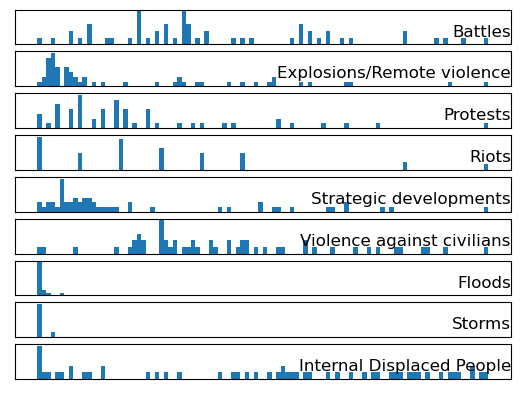

In [5]:
from matplotlib import pyplot

pyplot.figure()
for i in range(len(data_cut.columns)):
    # create subplot
    pyplot.subplot(len(data_cut.columns), 1, i+1)
    # get variable name
    name = data_cut.columns[i]
    # create histogram
    data_cut[name].hist(bins=100)
    # set title
    pyplot.title(name, y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

In [ ]:
pyplot.figure()
for i in range(len(data_cut.columns)):
    # create subplot
    pyplot.subplot(len(data_cut.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # plot data
    pyplot.plot(dataset[name])
    # set title
    pyplot.title(name, y=0)
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()